In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [264]:
df= pd.read_csv("churn.csv", na_values = " ")

In [265]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [266]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [268]:
mean = df['TotalCharges'].mean()

In [269]:
df = df.fillna(mean)

In [270]:
df = df.drop(['customerID'], axis = 1)

In [271]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [272]:
column = df.columns.drop(['tenure','SeniorCitizen','MonthlyCharges','TotalCharges'])

In [273]:
df_new = pd.get_dummies(df,columns = column, drop_first = True)

In [274]:
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [275]:
df_new.groupby(["Churn_Yes"]).count()/df.shape[0]*100

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Churn_Yes,,,,,,,,,,,,,,,,,,,,,
0,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,...,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013
1,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,...,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987


In [276]:
target = df_new["Churn_Yes"]

In [277]:
variable = df_new.drop(["Churn_Yes"], axis = 1)

In [278]:
variable.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [279]:
from sklearn.model_selection import train_test_split

In [280]:
x_train,x_test,y_train,y_test = train_test_split(variable,target,test_size = 0.3,random_state = 42)

In [281]:
from sklearn.neighbors import KNeighborsClassifier

In [282]:
from sklearn.model_selection import GridSearchCV

In [283]:
knn = KNeighborsClassifier()

In [284]:
parameters = {"n_neighbors" : np.arange(1,100)}

In [285]:
knnclassifier = GridSearchCV(knn , parameters, cv =10)

In [286]:
knnclassifier.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [287]:
print(knnclassifier.best_score_)

0.7799188640973631


In [288]:
print(knnclassifier.best_params_)

{'n_neighbors': 20}


In [289]:
print(knnclassifier.cv_results_)

{'mean_fit_time': array([0.0047878 , 0.00410764, 0.00379362, 0.00418699, 0.00349202,
       0.00418184, 0.00389004, 0.00399275, 0.00398774, 0.00368783,
       0.00369024, 0.0038904 , 0.00458906, 0.00598443, 0.00428972,
       0.00379107, 0.00418191, 0.00408974, 0.00389163, 0.00448611,
       0.00448706, 0.00429099, 0.00389056, 0.0034914 , 0.00418978,
       0.00468824, 0.00519023, 0.00399034, 0.00468831, 0.00428593,
       0.00389066, 0.00359092, 0.0050859 , 0.00429037, 0.00438936,
       0.0048938 , 0.00359197, 0.0038908 , 0.00458393, 0.00419068,
       0.00398707, 0.00419273, 0.0037914 , 0.00378826, 0.00379076,
       0.00409007, 0.00448534, 0.00398984, 0.00399077, 0.00339344,
       0.00369408, 0.00478835, 0.00408933, 0.00428922, 0.00349212,
       0.00389044, 0.00429347, 0.00399044, 0.00429101, 0.00389071,
       0.00418966, 0.00399022, 0.00428929, 0.00379107, 0.00408967,
       0.00469041, 0.00359137, 0.00409029, 0.00359476, 0.00408995,
       0.00478745, 0.00508337, 0.00379081, 0

In [290]:
results = pd.DataFrame(knnclassifier.cv_results_)

In [291]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004788,0.001715,0.056647,0.011601,1,{'n_neighbors': 1},0.720081,0.701826,0.707911,0.709939,0.677485,0.705882,0.713996,0.683570,0.703854,0.716024,0.704057,0.012971,99
1,0.004108,0.001025,0.053650,0.005218,2,{'n_neighbors': 2},0.754564,0.752535,0.752535,0.758621,0.736308,0.748479,0.756592,0.726166,0.746450,0.750507,0.748276,0.009447,97
2,0.003794,0.000599,0.058640,0.004985,3,{'n_neighbors': 3},0.758621,0.752535,0.748479,0.728195,0.730223,0.748479,0.764706,0.711968,0.718053,0.740365,0.740162,0.016614,98
3,0.004187,0.000977,0.071330,0.006509,4,{'n_neighbors': 4},0.789047,0.758621,0.774848,0.770791,0.742394,0.758621,0.766734,0.748479,0.742394,0.768763,0.762069,0.014200,95
4,0.003492,0.000669,0.070525,0.008103,5,{'n_neighbors': 5},0.793103,0.758621,0.774848,0.750507,0.736308,0.754564,0.772819,0.748479,0.742394,0.748479,0.758012,0.016430,96


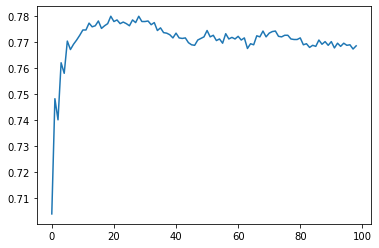

In [292]:
plt.plot(results["mean_test_score"])

In [293]:
knnclassifier.fit(x_test,y_test)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [294]:
print(knnclassifier.best_score_)

0.7841656979343646


In [295]:
print(knnclassifier.best_params_)

{'n_neighbors': 23}


In [296]:
print(knnclassifier.cv_results_)

{'mean_fit_time': array([0.00318813, 0.00288949, 0.00269313, 0.00289259, 0.00289252,
       0.00319228, 0.00299246, 0.00339077, 0.00239449, 0.00279307,
       0.00249355, 0.00259342, 0.00299037, 0.00298893, 0.00298944,
       0.00299351, 0.00329213, 0.00299349, 0.00289228, 0.0037904 ,
       0.00319026, 0.00279303, 0.00269346, 0.00329137, 0.00279264,
       0.00268915, 0.00328548, 0.00269098, 0.00298893, 0.00289261,
       0.00309289, 0.00288994, 0.00279603, 0.00319171, 0.00269361,
       0.00279274, 0.00279355, 0.00319183, 0.00289576, 0.00338821,
       0.00339873, 0.00388906, 0.00329168, 0.00299261, 0.00269094,
       0.00329249, 0.00319197, 0.002895  , 0.00249381, 0.00269277,
       0.00338717, 0.00289299, 0.00309222, 0.00289285, 0.00259371,
       0.00338531, 0.00279341, 0.00269372, 0.00328901, 0.00289278,
       0.00339091, 0.00269604, 0.00339422, 0.0032948 , 0.00319788,
       0.00318758, 0.00318866, 0.00288932, 0.00269601, 0.00269575,
       0.00229397, 0.00319149, 0.00269215, 0

In [297]:
results = pd.DataFrame(knnclassifier.cv_results_)

In [298]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003188,0.000866,0.017662,0.002097,1,{'n_neighbors': 1},0.745283,0.716981,0.735849,0.720379,0.687204,0.715640,0.720379,0.720379,0.710900,0.710900,0.718390,0.014609,99
1,0.002889,0.000698,0.015378,0.002199,2,{'n_neighbors': 2},0.745283,0.759434,0.768868,0.767773,0.748815,0.763033,0.739336,0.758294,0.753555,0.739336,0.754373,0.010354,98
2,0.002693,0.000639,0.016456,0.002454,3,{'n_neighbors': 3},0.778302,0.735849,0.787736,0.753555,0.753555,0.753555,0.734597,0.748815,0.777251,0.791469,0.761468,0.019619,85
3,0.002893,0.000829,0.019148,0.002353,4,{'n_neighbors': 4},0.745283,0.768868,0.792453,0.796209,0.744076,0.772512,0.763033,0.758294,0.758294,0.772512,0.767153,0.016521,49
4,0.002893,0.000828,0.018550,0.003191,5,{'n_neighbors': 5},0.783019,0.745283,0.797170,0.772512,0.758294,0.767773,0.772512,0.796209,0.763033,0.796209,0.775201,0.016808,20


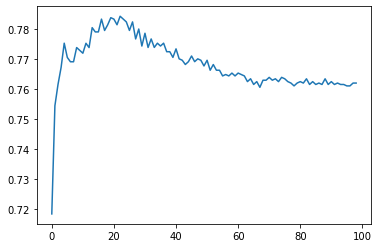

In [299]:
plt.plot(results["mean_test_score"])

In [300]:
y_pred = knnclassifier.predict(x_test)

In [301]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [302]:
from sklearn.metrics import classification_report

In [303]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1539
           1       0.71      0.42      0.53       574

    accuracy                           0.80      2113
   macro avg       0.76      0.68      0.70      2113
weighted avg       0.79      0.80      0.78      2113



In [304]:
knnclassifier.score(x_train,y_train)

0.7793103448275862

In [305]:
from sklearn.tree import DecisionTreeClassifier

In [306]:
decision_tree = DecisionTreeClassifier(random_state = 123)
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=123)

In [307]:
y_pred = decision_tree.predict(x_test)

In [308]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1539
           1       0.51      0.51      0.51       574

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



In [309]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

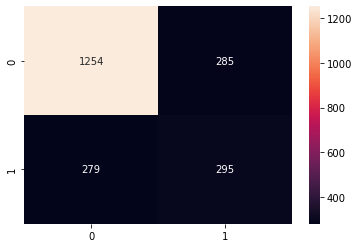

In [310]:
confusion_matrix_2 = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix_2,fmt = "d", annot = True)
plt.show

In [311]:
decision_tree.score(x_test,y_test)

0.7330809275911027

In [312]:
from sklearn.ensemble import RandomForestClassifier

In [313]:
random_forest = RandomForestClassifier(n_estimators=100)

In [314]:
random_forest.fit(x_train,y_train.values.ravel())

RandomForestClassifier()

In [315]:
y_pred = random_forest.predict(x_test)

In [316]:
random_forest.score(x_test,y_test)

0.7941315664931378

In [317]:
from sklearn.linear_model import LogisticRegression

In [318]:
model = LogisticRegression()

In [319]:
model.fit(x_train,y_train)

C:\Users\tarak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [320]:
from sklearn.metrics import accuracy_score

In [321]:
pred = model.predict(x_train)
acc = accuracy_score(pred, y_train)

In [322]:
print(acc)

0.8060851926977688


In [323]:
print(classification_report(pred,y_train))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      3901
           1       0.53      0.66      0.59      1029

    accuracy                           0.81      4930
   macro avg       0.72      0.75      0.73      4930
weighted avg       0.83      0.81      0.81      4930

